# Stats: Introduction to Exploratory Data Analysis

*Purpose*: *Exploratory Data Analysis* (EDA) is a __crucial__ skill for a practicing data scientist. Unfortunately, much like human-centered design EDA is hard to teach. This is because EDA is **not** a strict procedure, so much as it is a **mindset**. Also, much like human-centered design, EDA is an *iterative, nonlinear process*. There are two key principles to keep in mind when doing EDA:

1. Curiosity: Generate lots of ideas and hypotheses about your data.
2. Skepticism: Remain unconvinced of those ideas, unless you can find credible
  patterns to support them.

Since EDA is both *crucial* and *difficult*, we will practice doing EDA *a lot* in this course!


## Reading

*Reading*: [Exploratory Data Analysis](https://rstudio.cloud/learn/primers/3.1)

*Topics*: (All topics)

*Reading Time*: ~45 minutes


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

We'll study the diamonds dataset for this exercise.


In [2]:
from grama.data import df_diamonds
df_diamonds = (
    df_diamonds
    >> gr.tf_mutate(
        # Order the cut to aid in plotting
        cut=gr.as_factor(
            DF.cut,
            categories=[
                "Fair",
                "Good",
                "Very Good",
                "Premium",
                "Ideal"
            ]
        )
    )
)


# Basic EDA Tools

There are a few simple tools we can use to investigate a dataset. We should use these tools even before making visuals of the data.


### __q1__ Take the head

Use the appropriate function to get the first 5 observations in `df_diamonds`. Answer the questions under *observations* below.


In [3]:
# TASK: Get the first 10 observations
(
    df_diamonds
    >> gr.tf_head(5)
)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


*Observations*

- What variables does this dataset have?
  - `carat`, `cut`, `color`, `clarity`, `depth`, `table`, `price`, `x`, `y`, `z`
<!-- solution-end -->

### __q2__ Use descriptive statistics

The `gr.tf_describe()` function gives useful descriptive statistics on a dataset. Use these values to answer the questions under *observations* below.


In [4]:
# NOTE: No need to edit; run and inspect
(
    df_diamonds
    >> gr.tf_describe()
)

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


*Observations*

- How many observations are in the dataset?
  - There are `53940` observations.
- What is a typical value for the `price` of a diamond, according to this dataset?
  - A typical price is around `3000`. The mean price is `3932.80` and the median price is `2401`.
- What is the largest diamond in the dataset? (According to `carat`.) What is the smallest?
  - The smallest carat is `0.2` and the largest carat is `5.01`.
- You identified all the variables in the dataset in __q1__ above. Do the results from `gr.tf_describe()` provide information on **all** of these variables?
  - No: we do not see results for `cut`, `color`, or `clarity`.


## Distinct Values (levels)

Variables that do not take numerical values are sometimes called *categorical variables*; there are other tools that are useful for investigating categorical variables.

The verb `gr.tf_distinct()` is like `gr.tf_filter()`, but it filters for rows that are *distinct* according to the given variables. For instance, if we wanted to know what distinct values of `x` exist in `df_data`, we would call:

```python
(
    df_data
    >> gr.tf_distinct(DF.x)
)
```

*Aside*: A categorical variable is sometimes called a *factor*. The unique values of a categorical variable are called *levels*.

We can use `gr.tf_distinct()` to figure out what values show up for a categorical variable.


### __q3__ Find the distinct `cut` values

Use `gr.tf_distinct()` to find the unique values of `cut` in `df_diamonds`.


In [5]:
# TASK: Find the distinct `cut` values in the dataset
(
    df_diamonds
    >> gr.tf_distinct(DF.cut)
)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


## Counts

Another approach to assessing a categorical is to simply count the number of rows that correspond to each distinct value. We can do this with the `gr.tf_count()` verb. For instance, if we wanted to know how may rows there are for each value of `x` in `df_data`, we would call:

```python
(
    df_data
    >> gr.tf_count(DF.x)
)
```


### __q4__ Find the count of cut values

Use `gr.tf_count()` to find the number of rows for each distinct `cut` value in `df_diamonds`.


In [6]:
# TASK: Find the distinct `cut` values in the dataset
(
    df_diamonds
    >> gr.tf_count(DF.cut)
)


,cut,n
0,Fair,1610
1,Good,4906
2,Very Good,12082
3,Premium,13791
4,Ideal,21551


# Guided EDA

I'm going to walk you through a train of thought I had when studying the diamonds dataset.

There are four standard "C's" of [judging](https://en.wikipedia.org/wiki/Diamond_(gemstone)) a diamond. These are `carat, cut, color` and `clarity`, all of which are in the `df_diamonds` dataset.

*Note*: This remainder of this exercise will consist of interpreting pre-made graphs. You can run the whole notebook to generate all the figures at once. Just make sure to do all the exercises and write your observations!


## Hypothesis 1

Here's a hypothesis:

>  `Ideal` is the "best" value of `cut` for a diamond. Since an `Ideal` cut seems more labor-intensive, I hypothesize that `Ideal` cut diamonds are less numerous than other cuts.

### __q5__ Assess hypothesis 1

Run the chunk below, and study the plot. Was hypothesis 1 correct? Why
or why not?


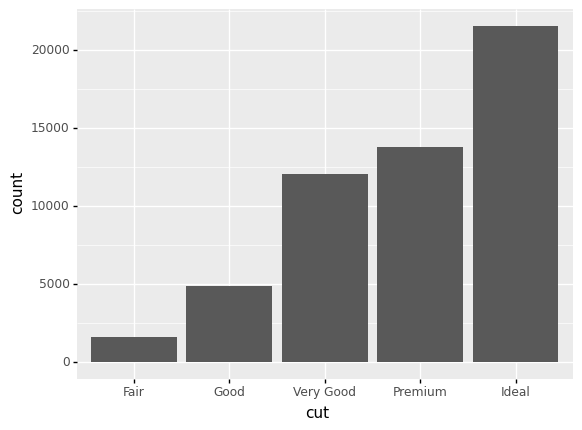

<ggplot: (8762373088910)>

In [7]:
# NOTE: No need to edit; run and inspect
(
    df_diamonds
    >> gr.ggplot(gr.aes("cut"))
    + gr.geom_bar()
)


*Observations*

- Is hypothesis 1 true or not?
  - The hypothesis was wrong: `Ideal` cut diamonds are *more* numerous than all other cuts! Perhaps because cutting a diamond is easier than mining a new one, gemcutters add value to a diamond by striving for an ideal cut.


## Hypothesis 2

Another hypothesis: 

> The `Ideal` cut diamonds should be the most pricey.


### __q6__ Assess hypothesis 2

Study the following graph; does it support, contradict, or not relate to hypothesis 2?


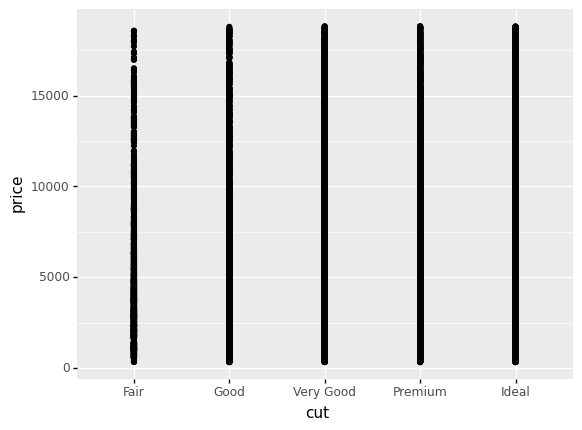

<ggplot: (8762375049593)>

In [8]:
# NOTE: No need to edit; run and inspect
(
    df_diamonds
    >> gr.ggplot(gr.aes("cut", "price"))
    + gr.geom_point()
)

*Observations*

- Does this plot support, contradict, or not relate to hypothesis 2?
  - This graph is virtually useless! There is severe overplotting. We cannot address Hypothesis 2 with this graph.


The following is a set of *boxplots*; the middle bar denotes the median, the boxes denote the *quartiles* (upper and lower "quarters" of the data), and the lines and dots denote large values and outliers.


### __q7__ Assess hypothesis 2, take 2

Study the following graph; does it support or contradict hypothesis 2?


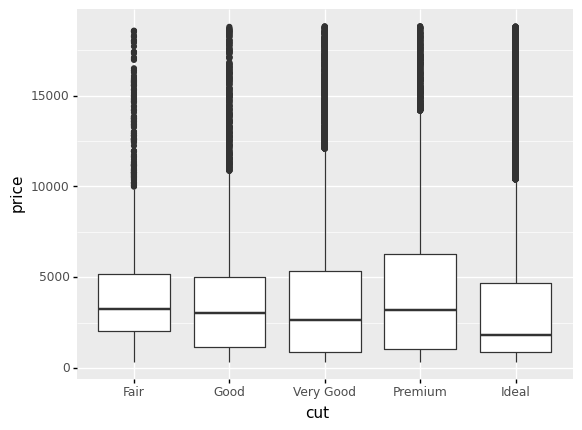

<ggplot: (8762375125170)>

In [9]:
# NOTE: No need to edit; run and inspect
(
    df_diamonds
    >> gr.ggplot(gr.aes("cut", "price"))
    + gr.geom_boxplot()
)


*Observations*

- Does this plot support or contradict hypothesis 2?
  - Surprisingly, `Ideal` diamonds tend to be the *least* pricey! This was very surprising to me.


Upon making the graph in __q3__, I was *very* surprised, so I did some reading on diamond cuts. It turns out that some gemcutters [sacrifice cut for carat](https://en.wikipedia.org/wiki/Diamond_(gemstone)#Cut). Could this effect explain the surprising pattern above?


### __q8__ Unravel hypothesis 2

Study the following graph; does it support a "sacrifice cut for carat" hypothesis? How might this relate to price?

*Hint*: The article linked above will help you answer these questions!


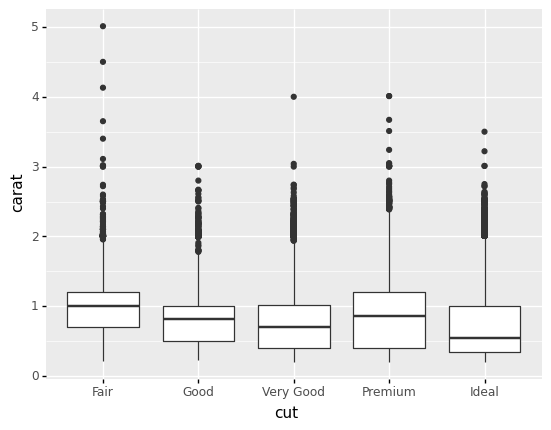

<ggplot: (8762373433293)>

In [10]:
# NOTE: No need to edit; run and inspect
(
    df_diamonds
    >> gr.ggplot(gr.aes("cut", "carat"))
    + gr.geom_boxplot()
)

*Observations*

- The median of `Ideal` diamonds is a fair bit lower in `carat` than other cuts. This provides some evidence that gemcutters trade `cut` for `carat`.
- The very largest `carat` diamonds tend to be of `Fair` cut; this makes sense, as cutting the gemstone will only reduce weight.
- It seems that many diamond purchasers are more interested in carat than fine cut. This provides some rationale for why `Ideal` diamonds are cheaper; they are necessarily lower-carat.
